**Question 01**

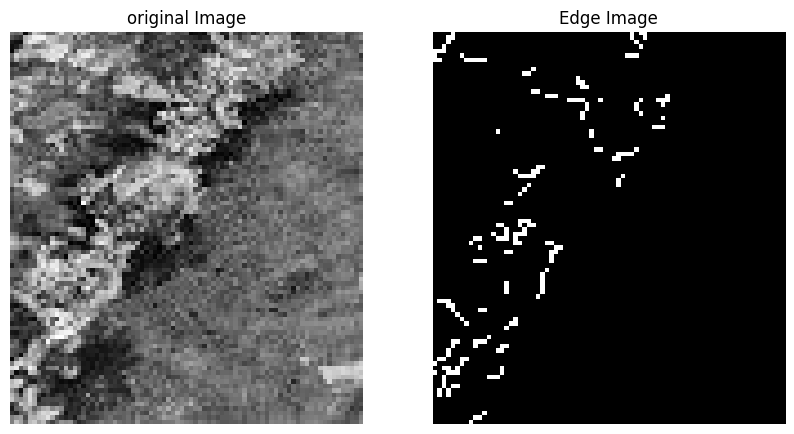

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original Image")
ax[0].axis('off')
ax[1].imshow(edges.astype('uint8'), cmap='gray')
ax[1].set_title("Edge Image")
ax[1].axis('off')

plt.show()


**Question 02**

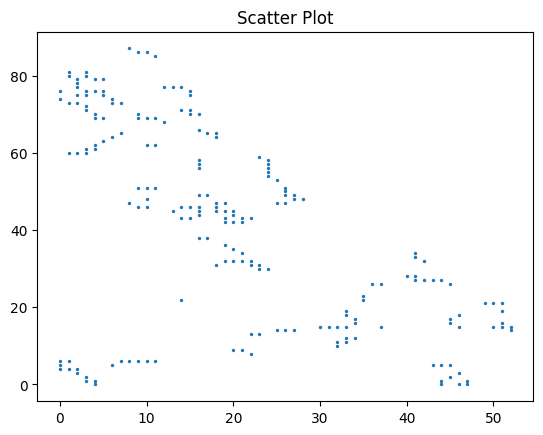

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


plt.scatter(x, y,s=2)
plt.title('Scatter Plot')
plt.show()

**Question 03**

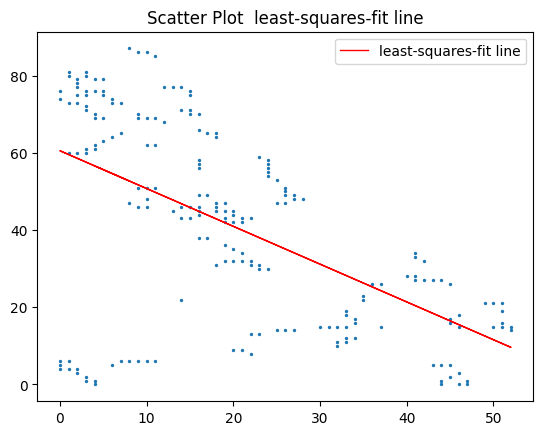

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


m,c = np.polyfit(x, y, 1)
y_ = m*x + c

plt.scatter(x, y,s=2)
plt.title('Scatter Plot  least-squares-fit line')
plt.plot(x, y_, color='r', linewidth=1, label=r'least-squares-fit line')
plt.legend(loc='best')
plt.show()


**Question 04**


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


m,c = np.polyfit(x, y, 1)
y_ = m*x + c

slope = np.arctan(m)*180/np.pi
print("Estimated value of the crop field angle:", slope, "degrees")

Estimated value of the crop field angle: -44.38702510610566 degrees


**Question 06**
